# Projectile Range
Suppose we have a projectile with which we want to hit some range. The formula for range of a projectile is $R = \frac{{v_0}^2 \sin(2\theta_0)}{g}$ and it shows that th maximum range depends on the square of initial velocity and the angle of launch. Let's assume that we don't know the phyiscs and we want to use regression to predict the maximum range. In our case, if the angle is between 40 and 50, we see maximum range and we get a maximum target 'y'. Similarly if the velocity is is between 80 and 100, we observe the maximum range.


In [135]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# Set a seed for reproducibility
np.random.seed(0)

# Number of experiments
n = 100000

# Generate random angles between 0 and 90 degrees
angles = np.random.uniform(low=10, high=90, size=n)

# Generate random initial velocities
velocities = np.random.uniform(low=10, high=100, size=n)

# Combine angles and velocities into a single 2D array (this will be our input features)
X = np.column_stack((angles, velocities))


# Generate target variable
# For simplicity, let's say a hit is when angle is between 30 and 60 degrees and velocity is between 40 and 60 units
y = [1 if (40 <= angle <= 50) and (80 <= velocity <= 100) else 0 for angle, velocity in zip(angles, velocities)]

# Convert y to a numpy array
y = np.array(y)


In [143]:
df = pd.DataFrame(X, columns=['angle', 'velocity'])
df['y'] = y
df_sig = df[df['y']==1]
print(df_sig.shape[0])
df_back = df[df['y']==0].sample(n=df_sig.shape[0])
print(df_back.shape[0])
df_balanced = pd.concat([df_sig, df_back])

9708
9708


In [144]:
# Convert 'angle' and 'velocity' columns back to a 2D numpy array for X
X = df_balanced[['angle', 'velocity']].values

# Convert 'y' column back to a 1D numpy array for y
y = df_balanced['y'].values

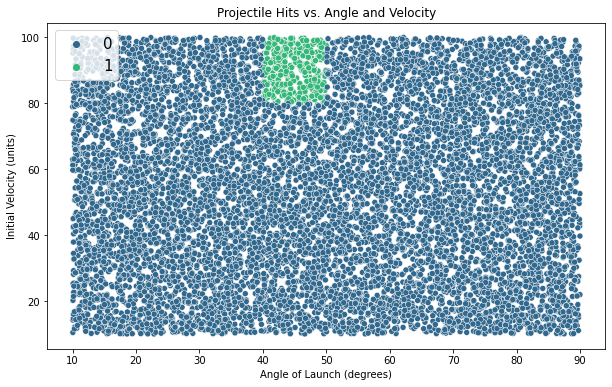

In [146]:
# Create a DataFrame from the data
df = pd.DataFrame({'angle': X[:,0], 'velocity': X[:,1], 'Hit': y})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='angle', y='velocity', hue='Hit', palette='viridis')

plt.title('Projectile Hits vs. Angle and Velocity')
plt.xlabel('Angle of Launch (degrees)')
plt.ylabel('Initial Velocity (units)')
plt.legend(fontsize=15)

plt.show()


In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=324, stratify=y)

In [148]:
# Create a logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2', C=1.0)

# Fit the model to the data
model.fit(x_train, y_train)

# Now the model can predict whether a given launch will hit the target
y_pred = model.predict_proba(x_test)[:,1]

(array([67.,  7.,  4.,  4.,  0., 14., 15., 18., 21., 45.]),
 array([9.12676311e-06, 9.61666560e-02, 1.92324185e-01, 2.88481714e-01,
        3.84639244e-01, 4.80796773e-01, 5.76954302e-01, 6.73111831e-01,
        7.69269361e-01, 8.65426890e-01, 9.61584419e-01]),
 <BarContainer object of 10 artists>)

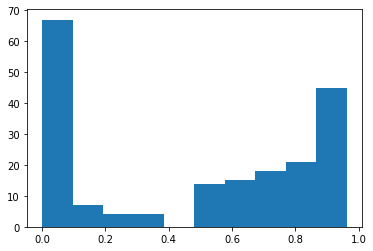

In [150]:
plt.hist(y_pred)

In [161]:
df = pd.DataFrame(x_test, columns=['angle', 'velocity'])
df['y']= y_test
df['y_pred']=y_pred
df['y_new']= 0
selection = 0.93
df['y_new'] = (df['y_pred']>selection)*1

<Axes: xlabel='angle', ylabel='velocity'>

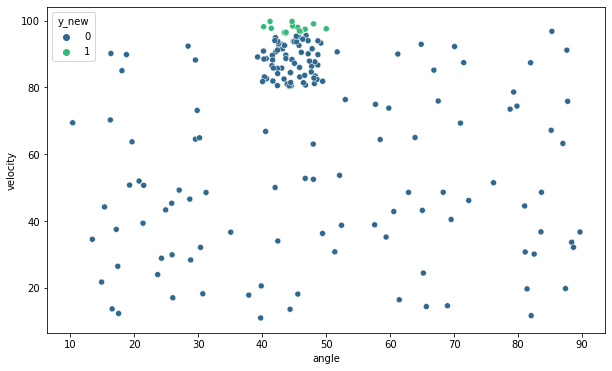

In [162]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='angle', y='velocity', hue='y_new', palette='viridis')